# Local optimization scores

* This is a comparison between the results of a local optimization of the pdbbind core dataset using the same protocol on different scoring functions.
* The goal is to observe similarity between these scoring functions and the reliability of each one's output compared to experimental data.

In [1]:
import pandas as pd

In [2]:
# Read experimental data
log = pd.read_csv('../supplementary/PDBBind_-logKiKd.csv')

# Invert signal
log['-logKi/Kd'] = -log['-logKi/Kd']
log.columns = ['id','logKi/Kd']

## First run data

In [3]:
# Read local optmization data
qvina   = pd.read_csv('local_opt_qvina.csv.gz', compression='gzip')
vina    = pd.read_csv('local_opt_vina.csv.gz', compression='gzip')
smina   = pd.read_csv('local_opt_smina.csv.gz', compression='gzip')
vinardo = pd.read_csv('local_opt_vinardo.csv.gz', compression='gzip')

In [4]:
data = pd.merge(qvina, vina, on=['id','pose'])
data = pd.merge(data, smina, on=['id','pose'])
data = pd.merge(data, vinardo, on=['id','pose'])
data = pd.merge(data, log, on=['id'])

In [5]:
data

,id,pose,qvina,vina,smina,vinardo,logKi/Kd
0,10gs,crystal,-7.40840,-7.40840,-7.66401,-9.43163,-6.40
1,1a30,crystal,-6.18745,-6.18745,-6.62616,-7.17012,-4.30
2,1bcu,crystal,-7.43975,-7.43975,-7.67768,-6.36559,-3.28
3,1e66,crystal,-12.10966,-12.10966,-12.77406,-14.70923,-9.89
4,1f8b,crystal,-6.17376,-6.17376,-6.99374,-5.73963,-5.40
...,...,...,...,...,...,...,...
171,4djv,crystal,-9.61258,-9.61258,-10.43985,-9.85025,-6.72
172,4g8m,crystal,-7.84356,-7.84356,-8.06764,-9.14858,-7.89
173,4gid,crystal,-10.89531,-10.89531,-12.13027,-15.71031,-10.77
174,4gqq,crystal,-4.20189,-4.20189,-4.81284,-5.06307,-2.89


In [6]:
# Remove outliers by the interquartile range method
for f in data.columns[2:]:
    Q1    = data[f].quantile(0.25)
    Q3    = data[f].quantile(0.75)
    IQR   = Q3 - Q1
    data  = data[~((data[f] < Q1 - 1.5 * IQR)|(data[f] > (Q3 + 1.5 * IQR)))]
data

,id,pose,qvina,vina,smina,vinardo,logKi/Kd
0,10gs,crystal,-7.40840,-7.40840,-7.66401,-9.43163,-6.40
1,1a30,crystal,-6.18745,-6.18745,-6.62616,-7.17012,-4.30
2,1bcu,crystal,-7.43975,-7.43975,-7.67768,-6.36559,-3.28
3,1e66,crystal,-12.10966,-12.10966,-12.77406,-14.70923,-9.89
4,1f8b,crystal,-6.17376,-6.17376,-6.99374,-5.73963,-5.40
...,...,...,...,...,...,...,...
171,4djv,crystal,-9.61258,-9.61258,-10.43985,-9.85025,-6.72
172,4g8m,crystal,-7.84356,-7.84356,-8.06764,-9.14858,-7.89
173,4gid,crystal,-10.89531,-10.89531,-12.13027,-15.71031,-10.77
174,4gqq,crystal,-4.20189,-4.20189,-4.81284,-5.06307,-2.89


In [7]:
df = pd.melt(data, id_vars=['id','pose'], value_vars=data.columns[2:])

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

* qvina, vina and smina have similar normal distributions, and vinardo has a flatter normal distribution. The scoring functions kde curves are lower in the x-axis than the experimental log(Ki/Kd) values.

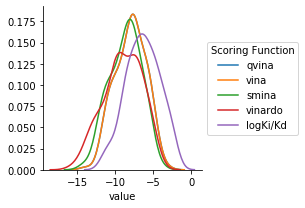

In [10]:
g = sns.FacetGrid(df, hue='variable')
g.map(sns.kdeplot, 'value')
plt.legend(title='Scoring Function', loc='center left', bbox_to_anchor=(1.0, 0.5))

* qvina and vina scores have 100% match, probably for applying the same local optimization function. Moreover, smina and qvina/vina have the highest correlation between scores, followed by vinardo and qvina/vina. All other correlation rates are less than ideal.

Text(0.5, 1, 'Spearman')

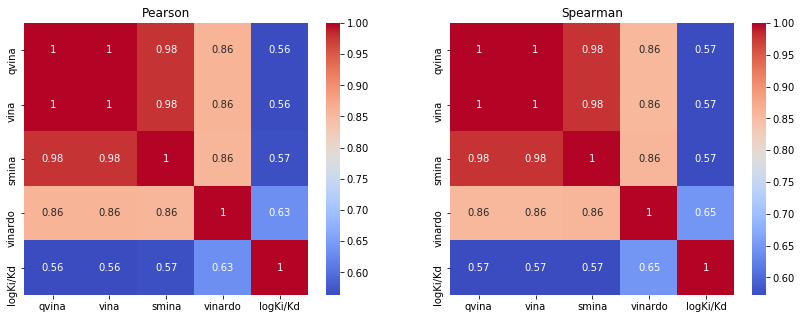

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(data.corr(method='pearson') , annot=True, cmap='coolwarm', ax=ax[0]).set_title('Pearson')
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Spearman')

In [12]:
from scipy.stats import pearsonr, spearmanr

In [13]:
import itertools

In [14]:
for f1, f2 in itertools.combinations(data.columns[2:], 2):
    p,_ = pearsonr(data[f1], data[f2])
    print(f'{f1:<7} / {f2:9}: {p:<.3f} (Pearson)')
    s,_ = spearmanr(data[f1], data[f2])
    print(f'{" ":<19}: {s:<.3f} (Spearman)')
    print('-' * 37)

qvina   / vina     : 1.000 (Pearson)
                   : 1.000 (Spearman)
-------------------------------------
qvina   / smina    : 0.979 (Pearson)
                   : 0.980 (Spearman)
-------------------------------------
qvina   / vinardo  : 0.859 (Pearson)
                   : 0.858 (Spearman)
-------------------------------------
qvina   / logKi/Kd : 0.564 (Pearson)
                   : 0.573 (Spearman)
-------------------------------------
vina    / smina    : 0.979 (Pearson)
                   : 0.980 (Spearman)
-------------------------------------
vina    / vinardo  : 0.859 (Pearson)
                   : 0.858 (Spearman)
-------------------------------------
vina    / logKi/Kd : 0.564 (Pearson)
                   : 0.573 (Spearman)
-------------------------------------
smina   / vinardo  : 0.858 (Pearson)
                   : 0.861 (Spearman)
-------------------------------------
smina   / logKi/Kd : 0.569 (Pearson)
                   : 0.573 (Spearman)
---------------------

In [15]:
import math

### Second run data

In [16]:
df2         = pd.read_csv('rescore_all.csv.gz', header=None, compression='gzip')
df2.columns = ['id','variable','value']

RFScoreVS_v2                 = pd.read_csv('rescore_rfscore.csv.gz', compression='gzip')
RFScoreVS_v2.columns         = ['id','RFScoreVS_v2']
RFScoreVS_v2['id']           = RFScoreVS_v2['id'].str.replace('_ligand','')
RFScoreVS_v2['RFScoreVS_v2'] = -RFScoreVS_v2['RFScoreVS_v2']
RFScoreVS_v2                 = pd.melt(RFScoreVS_v2, id_vars='id', value_vars='RFScoreVS_v2')

df2 = df2.append(RFScoreVS_v2)
df2 = df2[df2['value'] <= 0]

* Disregarding scale, all scoring functions, except for RFScoreVS_v2, have similar normal distributions.

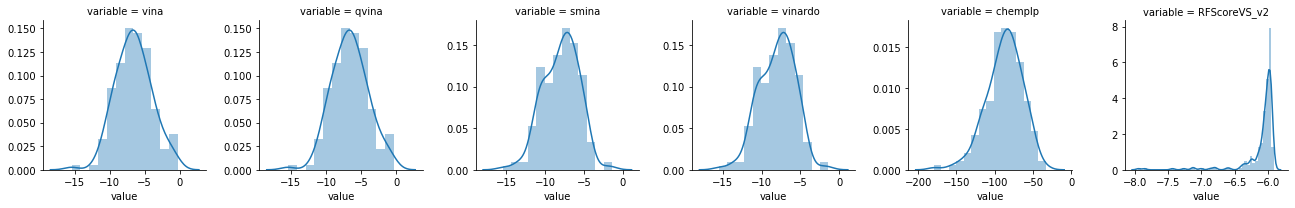

In [17]:
g = sns.FacetGrid(df2, col='variable', sharex=False, sharey=False)
g.map(sns.distplot, 'value')

In [18]:
data2 = df2.pivot_table(values='value',index='id',columns='variable').reset_index()
data2 = pd.merge(data2, log, on=['id'])

data2.dropna(inplace=True)
# data2 = data2[(data2['vina'] <= 0) & (data2['qvina'] <= 0)]
data2

,id,RFScoreVS_v2,chemplp,qvina,smina,vina,vinardo,logKi/Kd
0,10gs,-6.031003,-96.7711,-6.33235,-6.44462,-6.33235,-6.44462,-6.40
1,1a30,-5.975540,-61.4227,-5.32706,-6.03245,-5.32706,-6.03245,-4.30
2,1bcu,-5.957721,-66.0887,-7.43969,-7.67756,-7.43969,-7.67756,-3.28
3,1e66,-6.339842,-112.0040,-10.04009,-12.77408,-10.04009,-12.77408,-9.89
4,1f8b,-5.938129,-79.3881,-4.65742,-6.15925,-4.65742,-6.15925,-5.40
...,...,...,...,...,...,...,...,...
171,4djv,-6.054779,-80.8457,-9.93896,-10.43973,-9.93896,-10.43973,-6.72
172,4g8m,-5.998072,-100.0580,-5.16873,-5.67395,-5.16873,-5.67395,-7.89
173,4gid,-6.580508,-147.1690,-9.84533,-11.10362,-9.84533,-11.10362,-10.77
174,4gqq,-5.955173,-67.4410,-4.07580,-4.54705,-4.07580,-4.54705,-2.89


In [19]:
# Remove outliers by the interquartile range method
for f in data2.columns[1:-1]:
    Q1    = data2[f].quantile(0.25)
    Q3    = data2[f].quantile(0.75)
    IQR   = Q3 - Q1
    data2 = data2[~((data2[f] < Q1 - 1.5 * IQR)|(data2[f] > (Q3 + 1.5 * IQR)))]
data2

,id,RFScoreVS_v2,chemplp,qvina,smina,vina,vinardo,logKi/Kd
0,10gs,-6.031003,-96.7711,-6.33235,-6.44462,-6.33235,-6.44462,-6.40
1,1a30,-5.975540,-61.4227,-5.32706,-6.03245,-5.32706,-6.03245,-4.30
2,1bcu,-5.957721,-66.0887,-7.43969,-7.67756,-7.43969,-7.67756,-3.28
4,1f8b,-5.938129,-79.3881,-4.65742,-6.15925,-4.65742,-6.15925,-5.40
7,1gpk,-5.996197,-83.6203,-9.84889,-10.29537,-9.84889,-10.29537,-5.37
...,...,...,...,...,...,...,...,...
169,4dew,-6.018867,-49.5436,-1.48887,-5.49809,-1.48887,-5.49809,-7.00
171,4djv,-6.054779,-80.8457,-9.93896,-10.43973,-9.93896,-10.43973,-6.72
172,4g8m,-5.998072,-100.0580,-5.16873,-5.67395,-5.16873,-5.67395,-7.89
174,4gqq,-5.955173,-67.4410,-4.07580,-4.54705,-4.07580,-4.54705,-2.89


* However, apart from qvina/vina and smina/vinardo correlations, the scores correlation rates are low.

Text(0.5, 1, 'Spearman')

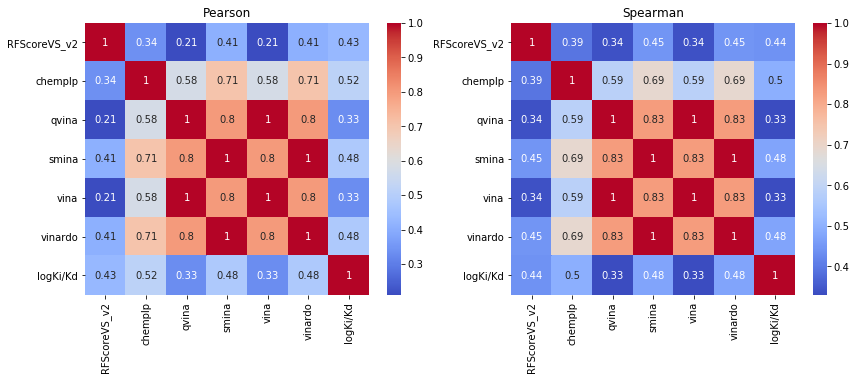

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(data2.corr(method='pearson') , annot=True, cmap='coolwarm', ax=ax[0]).set_title('Pearson')
sns.heatmap(data2.corr(method='spearman'), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Spearman')

In [21]:
for f1, f2 in itertools.combinations(data2.columns[2:], 2):
    p,_ = pearsonr(data2[f1], data2[f2])
    print(f'{f1:<7} / {f2:9}: {p:<.3f} (Pearson)')
    s,_ = spearmanr(data2[f1], data2[f2])
    print(f'{" ":<19}: {s:<.3f} (Spearman)')
    print('-' * 36)

chemplp / qvina    : 0.579 (Pearson)
                   : 0.586 (Spearman)
------------------------------------
chemplp / smina    : 0.707 (Pearson)
                   : 0.690 (Spearman)
------------------------------------
chemplp / vina     : 0.579 (Pearson)
                   : 0.586 (Spearman)
------------------------------------
chemplp / vinardo  : 0.707 (Pearson)
                   : 0.690 (Spearman)
------------------------------------
chemplp / logKi/Kd : 0.517 (Pearson)
                   : 0.497 (Spearman)
------------------------------------
qvina   / smina    : 0.803 (Pearson)
                   : 0.830 (Spearman)
------------------------------------
qvina   / vina     : 1.000 (Pearson)
                   : 1.000 (Spearman)
------------------------------------
qvina   / vinardo  : 0.803 (Pearson)
                   : 0.830 (Spearman)
------------------------------------
qvina   / logKi/Kd : 0.334 (Pearson)
                   : 0.330 (Spearman)
-----------------------------

### Correlation between first and second runs (run X and run Y)

In [22]:
all_ = pd.merge(data, data2, on=['id','logKi/Kd']).drop(['RFScoreVS_v2','chemplp'],axis=1)

In [23]:
for f in data.columns[2:-1]:
    f1 = f+'_x'
    f2 = f+'_y'
    p,_ = pearsonr(all_[f1], all_[f2])
    print(f'{f1:<9} + {f2:10}: {p:<.3f} (Pearson)')
    s,_ = spearmanr(all_[f1], all_[f2])
    print(f'{" ":<22}: {s:<.3f} (Spearman)')
    print('-' * 40)

qvina_x   + qvina_y   : 0.759 (Pearson)
                      : 0.781 (Spearman)
----------------------------------------
vina_x    + vina_y    : 0.759 (Pearson)
                      : 0.781 (Spearman)
----------------------------------------
smina_x   + smina_y   : 0.946 (Pearson)
                      : 0.944 (Spearman)
----------------------------------------
vinardo_x + vinardo_y : 0.793 (Pearson)
                      : 0.799 (Spearman)
----------------------------------------


Text(0.5, 1, 'Pearson Correlation')

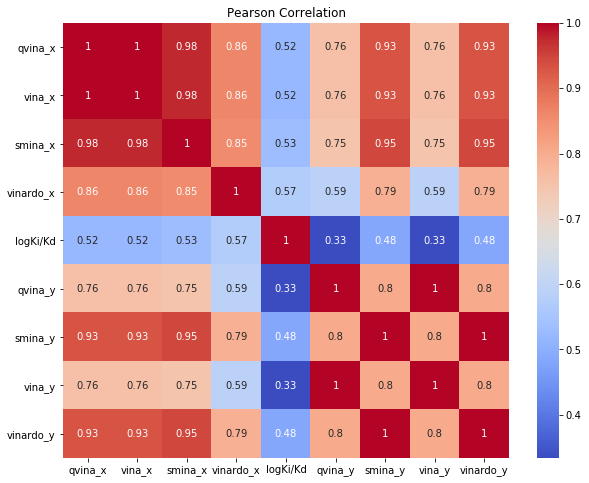

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(all_.corr(), annot=True, cmap='coolwarm', ax=ax).set_title('Pearson Correlation')

## Additional data

Text(0.5, 1, 'Literature data')

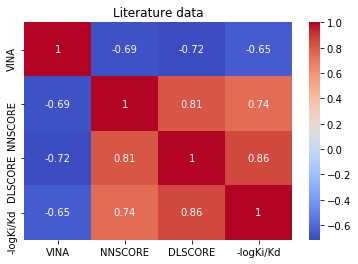

In [25]:
standard = pd.read_csv('../ALL_RESULTS.CSV')
standard.drop(['Unnamed: 0'], inplace=True, axis=1)
standard.columns = ['id','VINA','NNSCORE','DLSCORE','-logKi/Kd']
sns.heatmap(standard.corr(), annot=True, cmap='coolwarm').set_title('Literature data')